<span style="color: #8f3b43; font-size: 35px; font-weight: bold; display: inline-flex; align-items: center;">
  Tweets Sentiment Analysis 
  <img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Logo_of_Twitter.svg" alt="My Happy SVG" style="height: 35px; margin-left: 10px;">
</span>


In [41]:
import pandas as pd
df = pd.read_csv("Tweets.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [42]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


most of the data is an object so 

In [43]:
df.describe(include=['O'])

,airline_sentiment,negativereason,airline,airline_sentiment_gold,name,negativereason_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,14640,9178,14640,40,14640,32,14640,1019,14640,9907,9820
unique,3,10,6,3,7701,13,14427,832,14247,3081,85
top,negative,Customer Service Issue,United,negative,JetBlueNews,Customer Service Issue,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,9178,2910,3822,32,63,12,6,164,5,157,3744


In [84]:
from sklearn.feature_extraction.text import CountVectorizer ,ENGLISH_STOP_WORDS
from sklearn.model_selection import GridSearchCV
vect = CountVectorizer(stop_words= ENGLISH_STOP_WORDS)
param_grid = {
    'max_features': [1000, 2000, 3000],
    'ngram_range': [(1,1), (1,2), (1,3)],
    #unigram only, uni and bigram, uni and trigram
    'min_df' : [60,100,40],
    'max_df' : [1000,5000,4000],
    #ignore any term that frequentlly repeated less than the number you specify
}
grid_search = GridSearchCV(vect, param_grid, cv=5)


In [45]:
CountVectorizer?

Init signature:
CountVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
Docstring:     
Convert a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

For an efficiency comparision of the different feature extractors, see
:ref:`sphx_glr_auto_examples_text_plot_hashing_vs_dict_vectorizer.py`.

Read more in the :ref:`User Guid

In [46]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
test = df['text'].copy()
#we used the 're' stands for regular expression for replacing
for i in range(len(df)):
    test[i] = re.sub(r'@\S+', '', test[i])

df['text'] = test
df['text']

0                                              What  said.
1         plus you've added commercials to the experien...
2         I didn't today... Must mean I need to take an...
3         it's really aggressive to blast obnoxious "en...
4                 and it's a really big bad thing about it
                               ...                        
14635     thank you we got on a different flight to Chi...
14636     leaving over 20 minutes Late Flight. No warni...
14637      Please bring American Airlines to #BlackBerry10
14638     you have my money, you change my flight, and ...
14639     we have 8 ppl so we need 2 know how many seat...
Name: text, Length: 14640, dtype: object

In [92]:
from nltk import word_tokenize 

In [91]:
word_tokenize(df.text[1])
#it is a function that spilt each word and even punctaution into a separated element

['plus',
 'you',
 "'ve",
 'added',
 'commercials',
 'to',
 'the',
 'experience',
 '...',
 'tacky',
 '.']

In [93]:
tokens_list = [word_tokenize(text) for text in df.text]
#clean the tokens to remove any digits 
cleaned_tokens = [[word for word in item if word.isalpha()]for item in tokens_list]
len_tokens = []
for i in range(len(cleaned_tokens)):
    len_tokens.append(len(tokens_list[i]))

In [96]:
# a feature with punctuation and many word is a very emotionlly charged opinion 

In [97]:
df['n_tokens'] = len_tokens

In [52]:
#to detect the language 
from langdetect import detect_langs

In [53]:
languages = []
for row in range(len(df)):
    languages.append(detect_langs(df.iloc[row,10]))

In [54]:
languages = [str(languages[0]).split(':')[0][1:] for lang in languages]

In [55]:
df['language'] = languages
df.language.unique()
#so all the languges here is english, it's a useless column in this case 

array(['en'], dtype=object)

In [56]:
#list of the stop word that occur much 
#and that may cause bad outputs and visualizations
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [82]:
combined_text = ''

for index, row in df.tail(100).iterrows():
    combined_text += row['text'] + ' '

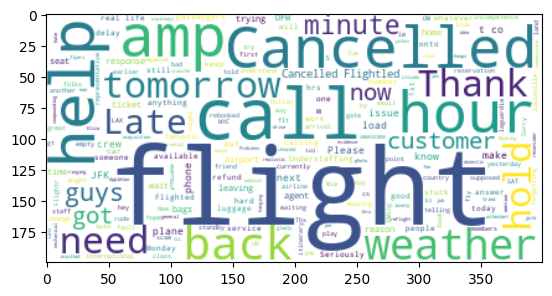

In [81]:
stop_words = set(STOPWORDS)
stop_words = ENGLISH_STOP_WORDS.union(['@','u','us','AA'])

#we can update the set and add words that we see it's not important 
cloud = WordCloud(background_color='white',stopwords=stop_words).generate(combined_text)
plt.imshow(cloud,interpolation='bilinear')

In [85]:
#isalpha() checks if the string contains only chars

In [ ]:
# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').____(____.____)
vect2.transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names()))

In [ ]:
#stemming : transformation of word to it's root form
# not always real words
#lemmatization : atucal words
# slower 


In [104]:
from nltk.stem import PorterStemmer 
porter = PorterStemmer()
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
#this function provides a better outputs
#we need to make each row is a list of tokens 
#and then apply the stemmer 
stemmed = [[stemmer.stem(token) for token in row]for row in cleaned_tokens]
stemmed
#but what is the point ????

[['what', 'said'],
 ['plus', 'you', 'ad', 'commerci', 'to', 'the', 'experi', 'tacki'],
 ['i',
  'did',
  'today',
  'must',
  'mean',
  'i',
  'need',
  'to',
  'take',
  'anoth',
  'trip'],
 ['it',
  'realli',
  'aggress',
  'to',
  'blast',
  'obnoxi',
  'entertain',
  'in',
  'your',
  'guest',
  'face',
  'amp',
  'they',
  'have',
  'littl',
  'recours'],
 ['and', 'it', 'a', 'realli', 'big', 'bad', 'thing', 'about', 'it'],
 ['serious',
  'would',
  'pay',
  'a',
  'flight',
  'for',
  'seat',
  'that',
  'did',
  'have',
  'this',
  'play',
  'it',
  'realli',
  'the',
  'onli',
  'bad',
  'thing',
  'about',
  'fli',
  'va'],
 ['yes',
  'near',
  'everi',
  'time',
  'i',
  'fli',
  'vx',
  'this',
  'ear',
  'worm',
  'won',
  't',
  'go',
  'away'],
 ['realli',
  'miss',
  'a',
  'prime',
  'opportun',
  'for',
  'men',
  'without',
  'hat',
  'parodi',
  'there',
  'https'],
 ['well', 'i', 'now', 'i', 'do'],
 ['it',
  'was',
  'amaz',
  'and',
  'arriv',
  'an',
  'hour',
  'e

In [102]:
from nltk.stem import WordNetLemmatizer

[['What', 'said'],
 ['plus', 'you', 'added', 'commercials', 'to', 'the', 'experience', 'tacky'],
 ['I',
  'did',
  'today',
  'Must',
  'mean',
  'I',
  'need',
  'to',
  'take',
  'another',
  'trip'],
 ['it',
  'really',
  'aggressive',
  'to',
  'blast',
  'obnoxious',
  'entertainment',
  'in',
  'your',
  'guests',
  'faces',
  'amp',
  'they',
  'have',
  'little',
  'recourse'],
 ['and', 'it', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it'],
 ['seriously',
  'would',
  'pay',
  'a',
  'flight',
  'for',
  'seats',
  'that',
  'did',
  'have',
  'this',
  'playing',
  'it',
  'really',
  'the',
  'only',
  'bad',
  'thing',
  'about',
  'flying',
  'VA'],
 ['yes',
  'nearly',
  'every',
  'time',
  'I',
  'fly',
  'VX',
  'this',
  'ear',
  'worm',
  'won',
  't',
  'go',
  'away'],
 ['Really',
  'missed',
  'a',
  'prime',
  'opportunity',
  'for',
  'Men',
  'Without',
  'Hats',
  'parody',
  'there',
  'https'],
 ['Well', 'I', 'NOW', 'I', 'DO'],
 ['it',
  'was',
  'amazin

In [ ]:
tfidf 
#how often the word appears within a document 
